In [1]:
letters = ['a','b','c','d','e','f','g','h','i','j']
data_path_1 = ['data/e1' + l + 't.csv' for l in letters]
data_path_1

['data/e1at.csv',
 'data/e1bt.csv',
 'data/e1ct.csv',
 'data/e1dt.csv',
 'data/e1et.csv',
 'data/e1ft.csv',
 'data/e1gt.csv',
 'data/e1ht.csv',
 'data/e1it.csv',
 'data/e1jt.csv']

In [2]:
import neural_network as nn
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Using TensorFlow backend.
W0717 12:14:12.497567 140422930822784 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


Populating the interactive namespace from numpy and matplotlib


In [3]:
dfs = [nn.load_nl_data({'data_path':path}) for path in data_path_1]

In [4]:
dfs = [df[df['time'] >= 489] for df in dfs]

In [5]:
dfs = [df.drop(columns=['old_pos', 'electors_state', 'votes_state', 'next_move', 'previous_votes', 'seats', 'previous_seats']) for df in dfs]

In [6]:
dfs = [pd.concat([df, pd.DataFrame(df['pos'].values.tolist(), columns = ['pos_x', 'pos_y'], index=df.index)], axis = 1) for df in dfs]

In [7]:
for i in range(len(letters)):
    dfs[i]['run'] = i

In [8]:
df = pd.concat(dfs)

In [9]:
df.describe()

,time,agent,votes,pos_x,pos_y,run
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,494.000000,1025.500000,317.875455,-0.987184,1.057719,4.500000
std,3.163716,2.873588,26.292364,1.360517,4.384840,2.873588
min,489.000000,1021.000000,217.000000,-3.671922,-10.399831,0.000000
25%,491.000000,1023.000000,309.000000,-2.001197,-2.945902,2.000000
50%,494.000000,1025.500000,324.000000,-0.854127,2.101376,4.500000
75%,497.000000,1028.000000,334.000000,-0.385100,4.440331,7.000000
max,499.000000,1030.000000,364.000000,2.371303,9.286291,9.000000


In [10]:
df[df['time'] == 499].describe()

,time,agent,votes,pos_x,pos_y,run
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000
mean,499.0,1025.500000,317.890000,-0.994002,1.055446,4.500000
std,0.0,2.886751,27.506802,1.367596,4.389347,2.886751
min,499.0,1021.000000,220.000000,-3.671922,-10.399831,0.000000
25%,499.0,1023.000000,308.750000,-2.001197,-2.891976,2.000000
50%,499.0,1025.500000,324.500000,-0.891120,2.090128,4.500000
75%,499.0,1028.000000,335.000000,-0.385100,4.368745,7.000000
max,499.0,1030.000000,360.000000,2.371303,9.286291,9.000000


In [11]:
df = df[df['time'] == 499]

In [12]:
df = df.drop(columns=['time','pos', 'agent'])

In [13]:
df['abs_x'] = abs(df['pos_x'])
df['abs_y'] = abs(df['pos_y'])
df.describe()

,votes,pos_x,pos_y,run,abs_x,abs_y
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,317.890000,-0.994002,1.055446,4.500000,1.421010,3.881730
std,27.506802,1.367596,4.389347,2.886751,0.910315,2.274105
min,220.000000,-3.671922,-10.399831,0.000000,0.002045,0.133966
25%,308.750000,-2.001197,-2.891976,2.000000,0.627058,2.650805
50%,324.500000,-0.891120,2.090128,4.500000,1.331183,3.440363
75%,335.000000,-0.385100,4.368745,7.000000,2.013352,4.954681
max,360.000000,2.371303,9.286291,9.000000,3.671922,10.399831


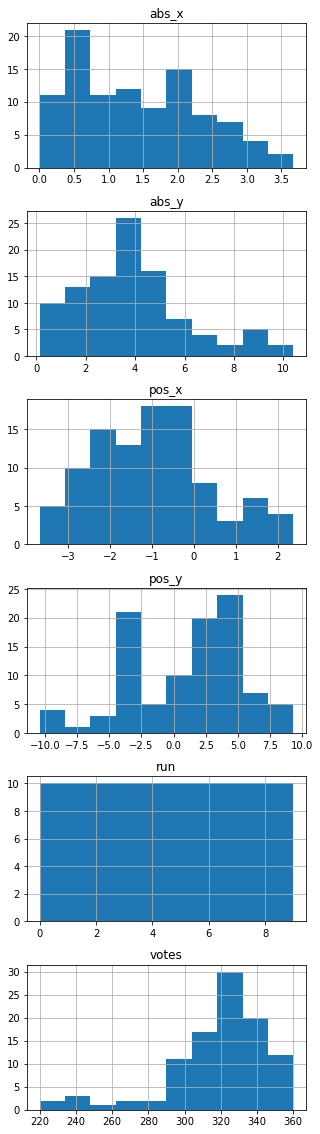

In [14]:
hist_1 = df.hist(layout=(6,1), figsize=(5,20))

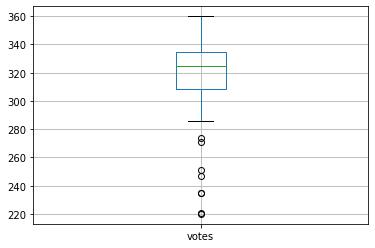

In [15]:
df.boxplot(column=['votes'], whis=1)

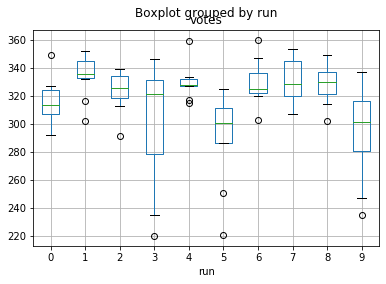

In [16]:
df.boxplot(column=['votes'], whis=1, by='run')

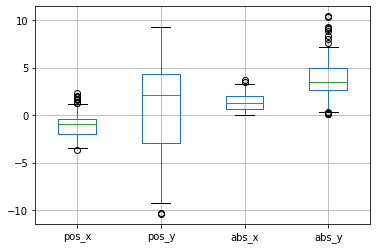

In [17]:
df.boxplot(column=['pos_x','pos_y', 'abs_x','abs_y'], whis=1)

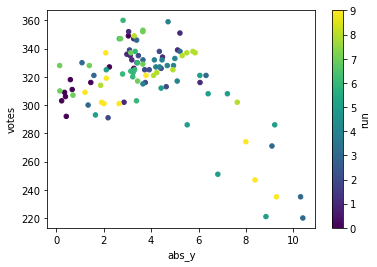

In [18]:
df.plot.scatter(x='abs_y', y='votes', c='run', colormap='viridis', sharex=False)

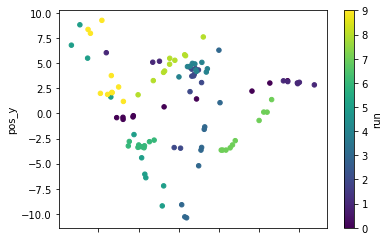

In [19]:
df.plot.scatter(x='pos_x', y='pos_y', c='run', colormap='viridis')

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
linreg = ols('votes ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     4.671
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           4.33e-05
Time:                        12:14:52   Log-Likelihood:                -453.67
No. Observations:                 100   AIC:                             927.3
Df Residuals:                      90   BIC:                             953.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     315.7000      7.532     41.915      0.000     300.737     330.663
C(run)[T.1]    18.7000     10.652      1.756      0.083      -2.461      39.861
C(run)[T.2]     8.1000     10.652      0.760      0.449     -13.061      29.261
C(run)[T.3]   -14.3000     10.652     -1.343      0.183     -35.461       6.861
C(run)[T.4]    14.1000     10.652      1.324      0.189      -7.061      35.261
C(run)[T.5]   -24.6000     10.652     -2.310      0.023     -45.761      -3.439
C(run)[T.6]    13.5000     10.652      1.267      0.208      -7.661      34.661
C(run)[T.7]    15.1000     10.652      1.418      0.160      -6.061      36.261
C(run)[T.8]    12.4000     10.652      1.164      0.247      -8.761      33.561
C(run)[T.9]   -21.1000     10.652     -1.981      0.051     -42.261       0.061
==============================================================================
Omnibus:                       23.282   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.520
Skew:                          -1.043   Prob(JB):                     1.94e-08
Kurtosis:                       5.042   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,23850.29,2650.032222,4.671444,0.000043
Residual,90.0,51055.50,567.283333,NaN,NaN


In [23]:
linreg = ols('abs_x ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abs_x   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     29.38
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           3.75e-23
Time:                        12:14:54   Log-Likelihood:                -63.463
No. Observations:                 100   AIC:                             146.9
Df Residuals:                      90   BIC:                             173.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7308      0.152     11.376      0.000       1.428       2.033
C(run)[T.1]     0.0804      0.215      0.374      0.709      -0.347       0.508
C(run)[T.2]    -1.0235      0.215     -4.757      0.000      -1.451      -0.596
C(run)[T.3]    -1.2585      0.215     -5.849      0.000      -1.686      -0.831
C(run)[T.4]    -1.1378      0.215     -5.288      0.000      -1.565      -0.710
C(run)[T.5]     0.6278      0.215      2.918      0.004       0.200       1.055
C(run)[T.6]     0.2132      0.215      0.991      0.324      -0.214       0.641
C(run)[T.7]    -1.1359      0.215     -5.279      0.000      -1.563      -0.708
C(run)[T.8]    -0.5295      0.215     -2.461      0.016      -0.957      -0.102
C(run)[T.9]     1.0663      0.215      4.956      0.000       0.639       1.494
==============================================================================
Omnibus:                        2.298   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.924
Skew:                           0.078   Prob(JB):                        0.382
Kurtosis:                       3.661   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,61.205361,6.800596,29.378695,3.747033e-23
Residual,90.0,20.833247,0.231481,NaN,NaN


In [25]:
linreg = ols('pos_x ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pos_x   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     15.86
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           3.21e-15
Time:                        12:14:55   Log-Likelihood:                -125.20
No. Observations:                 100   AIC:                             270.4
Df Residuals:                      90   BIC:                             296.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.9728      0.282     -3.449      0.001      -1.533      -0.412
C(run)[T.1]     1.4791      0.399      3.708      0.000       0.687       2.272
C(run)[T.2]     0.2655      0.399      0.666      0.507      -0.527       1.058
C(run)[T.3]     0.5054      0.399      1.267      0.208      -0.287       1.298
C(run)[T.4]     0.3798      0.399      0.952      0.344      -0.413       1.172
C(run)[T.5]    -1.3858      0.399     -3.474      0.001      -2.178      -0.593
C(run)[T.6]    -0.9712      0.399     -2.435      0.017      -1.764      -0.179
C(run)[T.7]     1.5676      0.399      3.930      0.000       0.775       2.360
C(run)[T.8]    -0.2285      0.399     -0.573      0.568      -1.021       0.564
C(run)[T.9]    -1.8243      0.399     -4.573      0.000      -2.617      -1.032
==============================================================================
Omnibus:                       12.804   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               35.709
Skew:                          -0.248   Prob(JB):                     1.76e-08
Kurtosis:                       5.885   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,113.548597,12.616511,15.855877,3.213803e-15
Residual,90.0,71.612938,0.795699,NaN,NaN


In [27]:
mlr = linreg = ols('votes ~ C(run) + pos_x + pos_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     4.742
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.11e-05
Time:                        12:14:55   Log-Likelihood:                -449.56
No. Observations:                 100   AIC:                             923.1
Df Residuals:                      88   BIC:                             954.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     322.9506      7.794     41.438      0.000     307.463     338.439
C(run)[T.1]    11.1963     11.412      0.981      0.329     -11.482      33.874
C(run)[T.2]     7.4753     10.430      0.717      0.475     -13.252      28.202
C(run)[T.3]   -21.4228     10.994     -1.949      0.055     -43.271       0.425
C(run)[T.4]    14.4752     10.785      1.342      0.183      -6.959      35.909
C(run)[T.5]   -16.9787     11.175     -1.519      0.132     -39.187       5.229
C(run)[T.6]    16.8285     11.165      1.507      0.135      -5.359      39.016
C(run)[T.7]     2.2972     11.343      0.203      0.840     -20.244      24.839
C(run)[T.8]    17.1319     10.790      1.588      0.116      -4.310      38.574
C(run)[T.9]    -6.1892     11.680     -0.530      0.598     -29.401      17.022
pos_x           6.7342      2.739      2.459      0.016       1.291      12.177
pos_y          -0.8037      0.772     -1.041      0.301      -2.338       0.731
==============================================================================
Omnibus:                       25.478   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.411
Skew:                          -1.073   Prob(JB):                     3.74e-10
Kurtosis:                       5.411   Cond. No.                         47.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
mlr = linreg = ols('votes ~ C(run) + abs_x + abs_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     15.58
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.26e-16
Time:                        12:14:55   Log-Likelihood:                -418.80
No. Observations:                 100   AIC:                             861.6
Df Residuals:                      88   BIC:                             892.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     366.6128      8.517     43.046      0.000     349.688     383.538
C(run)[T.1]    37.8721      7.999      4.735      0.000      21.976      53.768
C(run)[T.2]    -1.5729      8.750     -0.180      0.858     -18.961      15.816
C(run)[T.3]   -19.8313      9.573     -2.072      0.041     -38.855      -0.808
C(run)[T.4]     6.9531      9.145      0.760      0.449     -11.221      25.127
C(run)[T.5]    20.3048      9.046      2.245      0.027       2.327      38.283
C(run)[T.6]    30.7948      7.841      3.927      0.000      15.212      46.378
C(run)[T.7]    -6.5719      8.729     -0.753      0.454     -23.918      10.774
C(run)[T.8]    22.3852      8.485      2.638      0.010       5.523      39.247
C(run)[T.9]    23.8116      9.032      2.636      0.010       5.862      41.761
abs_x         -24.7358      3.727     -6.636      0.000     -32.143     -17.328
abs_y          -6.4372      0.922     -6.984      0.000      -8.269      -4.605
==============================================================================
Omnibus:                        0.375   Durbin-Watson:                   2.269
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.335
Skew:                          -0.137   Prob(JB):                        0.846
Kurtosis:                       2.927   Cond. No.                         56.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df['abs_y_t'] = abs (df['abs_y'] - 3.8)

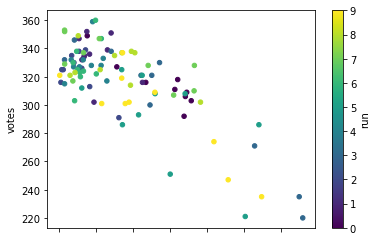

In [30]:
df.plot.scatter(x='abs_y_t', y='votes', c='run', colormap='viridis')

In [31]:
mlr = linreg = ols('votes ~ C(run) + abs_x + abs_y_t', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     21.63
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.50e-20
Time:                        12:14:57   Log-Likelihood:                -407.37
No. Observations:                 100   AIC:                             838.7
Df Residuals:                      88   BIC:                             870.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     370.9851      7.652     48.483      0.000     355.779     386.192
C(run)[T.1]     1.2654      7.106      0.178      0.859     -12.856      15.387
C(run)[T.2]   -30.7095      7.753     -3.961      0.000     -46.117     -15.302
C(run)[T.3]   -26.2667      8.195     -3.205      0.002     -42.553      -9.981
C(run)[T.4]   -23.6944      7.855     -3.017      0.003     -39.304      -8.085
C(run)[T.5]   -12.6527      7.100     -1.782      0.078     -26.763       1.457
C(run)[T.6]    -6.0348      7.325     -0.824      0.412     -20.592       8.523
C(run)[T.7]   -13.0927      7.761     -1.687      0.095     -28.516       2.330
C(run)[T.8]    -7.2708      7.048     -1.032      0.305     -21.278       6.737
C(run)[T.9]    -6.2825      7.731     -0.813      0.419     -21.647       9.082
abs_x         -14.1995      3.475     -4.087      0.000     -21.105      -7.294
abs_y_t       -12.0829      1.319     -9.159      0.000     -14.705      -9.461
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.410
Skew:                          -0.098   Prob(JB):                        0.815
Kurtosis:                       2.755   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
mlr = linreg = ols('votes ~ abs_x + abs_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     33.85
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           7.06e-12
Time:                        12:14:58   Log-Likelihood:                -446.36
No. Observations:                 100   AIC:                             898.7
Df Residuals:                      97   BIC:                             906.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    358.6284      5.391     66.521      0.000     347.928     369.329
abs_x        -12.8705      2.355     -5.466      0.000     -17.544      -8.197
abs_y         -5.7833      0.942     -6.136      0.000      -7.654      -3.913
==============================================================================
Omnibus:                        6.560   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.015
Skew:                          -0.570   Prob(JB):                       0.0494
Kurtosis:                       3.378   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
data_path_random_1 = ['data/e1' + l + 'r.csv' for l in letters]

In [34]:
dfsr = [nn.load_nl_data({'data_path':path}) for path in data_path_random_1]
dfsr = pd.concat(dfsr)
dfsr = pd.concat([dfsr, pd.DataFrame(dfsr['pos'].values.tolist(), columns = ['pos_x', 'pos_y'], index=dfsr.index)], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6829d34e0>],
      dtype=object)

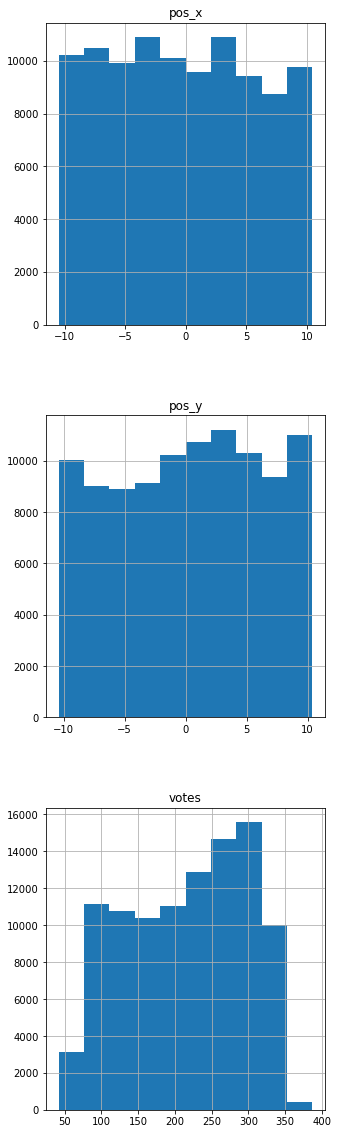

In [35]:
dfsr.hist(column=['votes', 'pos_x', 'pos_y'], layout=(3,1), figsize=(5,20))

In [36]:
dfsr.describe()

,time,agent,next_move,previous_votes,votes,previous_seats,seats,pos_x,pos_y
count,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.0000,100000.0,100000.000000,100000.000000
mean,4999.500000,1000.0,1.996020,215.423450,215.444820,0.9999,1.0,-0.213074,0.261007
std,2886.765765,0.0,1.413741,80.792619,80.767574,0.0100,0.0,6.010835,5.995424
min,0.000000,1000.0,0.000000,0.000000,42.000000,0.0000,1.0,-10.486637,-10.412890
25%,2499.750000,1000.0,1.000000,146.000000,146.000000,1.0000,1.0,-5.486637,-4.859457
50%,4999.500000,1000.0,2.000000,225.000000,225.000000,1.0000,1.0,-0.337571,0.387116
75%,7499.250000,1000.0,3.000000,286.000000,286.000000,1.0000,1.0,4.846744,5.333294
max,9999.000000,1000.0,4.000000,387.000000,387.000000,1.0000,1.0,10.466066,10.387116


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

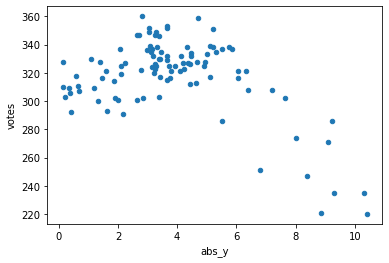

In [37]:
figure, axes = plt.subplots()
dfsr.hist(column=['votes'],figsize=(7,5), ax=axes)
figure.savefig('plot/ex1rvotes.pdf')
figure.clear()
figure, axes = plt.subplots()
df.hist(column=['votes'],figsize=(7,5), ax=axes)
figure.savefig('plot/ex1tvotes.pdf')
figure.clear()
figure, axes = plt.subplots()
df.hist(column=['abs_y'],figsize=(7,5), ax=axes)
figure.savefig('plot/ex1absy.pdf')
figure.clear()
figure, axes = plt.subplots()
df.plot.scatter(x='abs_y', y='votes', ax=axes)
figure.savefig('plot/ex1yvotes.pdf')